##VIAJE A MARTE##

Presentado Por Joan Mauricio Yanza Ruiz

**INTRODUCCION:** La humanidad ha puesto al planeta Marte como un objetivo  de la exploración espacial tripulada.

El dilema es que el traslado de seres humanos a ese mundo es una hazaña muy difícil por muchos factores como las grandes distancias y el tiempo de viaje.

La órbita de Hohmann es una solución planteada para que una nave espacial abarque  grandes distancias entre planetas en el menor tiempo posible.


**PROBLEMA:** Se quiere enviar exitosamente una nave espacial tripulada desde la Tierra a Marte y regresar  por medio de la  órbita de  Hohmann.

Para ello deben calcularse  diferentes parámetros con  métodos computacionales. Cabe agregar que a partir de los resultados se puede  simular la  trayectoria  y verificar si la nave  llega sin problemas a Marte.

También se pueden usar la interpolación , algo muy útil para obtener más datos como la posición de la nave en un momento dado.


**OBJETIVOS:**
General:
-Aplicar los conocimientos aprendidos en el curso de métodos computacionales en el modelamiento de un  exitoso viaje tripulado a Marte.


Específicos
-Determinar la velocidad de escape de la nave,  cambio de velocidad en el espacio para la ida  y el  amartizaje, tiempo de viaje, ángulo de lanzamiento y regreso, fechas y horas  de lanzamiento y  amartizaje.
-Realizar una simulación que muestre la órbita de transferencia de Hohmann que describe la nave espacial.
-Usar la interpolación en la resolución de un ejercicio asociado al viaje.

Desarrollo del codigo:

1) Calculo de los deltas de velocidad: se emplean para impulsar y  frenar a la nave ya sea para llevarlo a Marte primeramente  y  luego evitar que pase derecho y no se pose sobre la superficie marciana. Se necesita estimar las velocidades orbitales media de la Tierra y Marte primero, luego se calcula la  velocidad en perihelio y afelio de la nave.

###En primer lugar se usa la ley de gravitacion universal para hallar velocidades orbitales media de Marte y la Tierra ###

$$ F_g = ma = \frac{GMm}{r^2}$$

$$ a = \frac{GM}{r^2}$$

$$ \frac{v^2}{r} = \frac{GM}{r^2}$$

$$ v = \sqrt{\frac{GM}{r}}$$

Donde M= masa del Sol =1.98 x 10^30 kg
y G = 6.67·10-11 Nm^2/kg^2,


rT= Distancia media Sol-Tierra=1.49^11 m

Distancia media Sol-Marte=rM=2.28x10^11 m

Supondremos que los planetas, Marte y la Tierra describen órbitas circulares alrededor del Sol

In [ ]:
pip install astropy

In [ ]:
!pip install -Uq celluloid

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd
from astropy.coordinates import get_body_barycentric, ICRS,SkyCoord, HeliocentricEclipticIAU76
from astropy.time import Time
from datetime import datetime, timedelta
from scipy import  optimize
import math
from matplotlib.animation import FuncAnimation
from celluloid import Camera
from IPython.display import HTML
from scipy.interpolate import CubicSpline
import astropy.units as u

In [ ]:
mS = 1.98E30
G = 6.67E-11
rT = 1.49E11
rM = 2.28E11

vel_tierra = np.sqrt(G*mS / rT )
vel_marte = np.sqrt(G*mS / rM )

In [ ]:
print(f"La velocidad orbital media de la Tierra es {round(vel_tierra,3)} m/s ")
print(f"La velocidad orbital media de Marte es {round(vel_marte,3)} m/s ")

La velocidad orbital media de la Tierra es 29771.614 m/s 
La velocidad orbital media de Marte es 24067.34 m/s 


###ORBITA DE TRANSFERENCIA DE HOHMANN###
Supondremos despreciables la influencia de los planetas sobre el movimiento de la nave espacial en su trayecto de la Tierra a Marte.
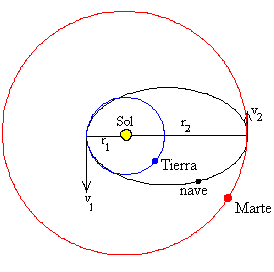
Grafica 1

En la  grafica 1 , se observa que la orbita terrestre es de color azul y la orbita marciana es de color rojo. La orbita de transferencia de Hohmann es de color negro, y tiene forma de elipse. El Sol se encuentra en uno de los focos.  Se observa a r1 = rT,  que es la distancia entre el punto mas cercano de la orbita de Hohmann al Sol (llamado perihelio)  y el Sol que coincide con la distancia Tierra-Sol. Asimismo,se observa a r2=rM,  que es la distancia entre el punto mas lejano  de la orbita de Hohmann al Sol (llamado afelio)  y el Sol que coincide con la distancia Marte-Sol.
Se calcula la velocidad de la nave en el perihelio v1 y en el afelio v2.
La nave se mueve en el mismo sentido que las orbitas marcianas y terrestres

Sea m la masa de la nave , se sabe que el momento angular se conserva  por tanto:

Momento angular perihelio = Momento angular afelio


$$r1mv1 * sin 90° = r2mv2 * sin 90° $$
$$r1v1  = r2 v2 $$


$$r_1^2 v_1^2  = r_2^2 v_2^2 $$


$$r_1^2 v_1^2 - r_2^2 v_2^2 =0 $$



$$(1.49 \times 10^{11})^2 v_1^2 - (2.28 \times 10^{11})^2 v_2^2 =0 $$



Como la fuerza de atracción gravitacional es conservativa, la energia total es constante, entonces:

$$ Energia_{perihelio} = Energia_{afelio}$$


In [ ]:
""" se halla la expresion de la energia potencial gravitacional  a partir
de la integral de linea de la fuerza gravitacional """
G = sp.Symbol("G")
M = sp.Symbol("M")

m = sp.Symbol("m")
r1 = sp.Symbol("r1")

Fuerza = G*M*m / r1**2

energia_post= sp.integrate(Fuerza,r1)
energia_post

-G*M*m/r1

$$ Energia_{perihelio} = E_{cinetica_p} + E_{potencial_p}$$

$$ Energia_{perihelio} = 0.5mv_1^2 - \frac{GMm}{r_1}$$

$$ Energia_{afelio} = 0.5mv_2^2 - \frac{GMm}{r_2}$$

$$ 0.5mv_1^2 - \frac{GMm}{r_1} = 0.5mv_2^2 - \frac{GMm}{r_2}$$

$$ \frac{GM}{r_2} - \frac{GM}{r_1}= 0.5(v_2^2 - v_1^2) $$

In [ ]:
""" vamos a ver los valores de GM/r2 y GM/r1"""
G = sp.Symbol("G")
G = 6.67E-11
M = sp.Symbol("M")
M =1.98E30
m = sp.Symbol("m")
m=1
r1 = sp.Symbol("r1")
r2 = sp.Symbol("r2")

Fuerza = G*M*m / r1**2

energia_post= sp.integrate(Fuerza,r1)
energia_post

energia = sp.lambdify(r1, energia_post, 'numpy')


In [ ]:
""" el valor de la diferencia GM/r2 -GM/r1 """
dif = energia(rM) - energia(rT)
dif

307112151.18332744

Tenemos un sistema de ecuaciones lineales:
$$ 307112151.18332744 = 0.5v_2^2 - 0.5v_1^2$$

$$ 0=(1.49 \times 10^{11})^2 v_1^2 - (2.28 \times 10^{11})^2 v_2^2$$

Se toma $$ x= v_1^2$$ y $$ y= v_2^2$$, entonces:

$$ 307112151.18332744 = 0.5y - 0.5x$$

$$ 0=(1.49 \times 10^{11})^2x - (2.28 \times 10^{11})^2y$$

In [ ]:
valor1 = (1.49 * 10**11) **2
valor2 = (2.28 * 10**11) **2

"""Creo la matriz para resolver el sistema de ecuaciones """
A = np.matrix([
    [-0.5, 0.5],
              [valor1,-valor2]
              ])
""" el vector b """
b = np.array([dif, 0])

In [ ]:
""" se resuelve el sistema de ecuaciones con linalg.solve"""
velocidades_nave_cuadrado = -np.linalg.solve(A,b)
vel_nave = velocidades_nave_cuadrado ** 0.5
v1 = vel_nave[0]
v2 = vel_nave[1]
print("La velocidad de la nave en el perihelio  es ", round(v1,1), "m/S")
print("La velocidad de la nave en el afelio es ",round(v2,2), "m/s")

La velocidad de la nave en el perihelio  es  32742.7 m/S
La velocidad de la nave en el afelio es  21397.62 m/s


Cuando se lanza la nave espacial desde las proximidades del planeta Tierra y en la dirección de su movimiento orbital, hemos de incrementar la velocidad de la nave para que llegue al planeta Marte. El incremento es:
$$ v_1 - v_{tierra} = Δv_t$$
En el viaje de regreso, cuando lanzamos la nave en las proximidades del planeta Marte y en la dirección de su movimiento orbital, debemos disminuir su velocidad en:
$$ v_2 - v_{marte} = Δv_m$$



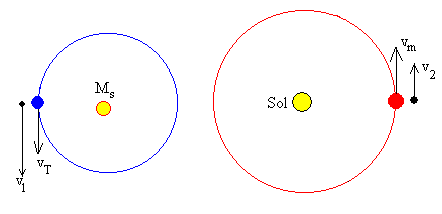

In [ ]:
delta_v_lanzamiento = v1 - vel_tierra
delta_v_regreso = v2 - vel_marte

In [ ]:
print("El incremento de la velocidad de la nave en proximidades de la Tierra para comenzar su viaje a Marte es", round(delta_v_lanzamiento,2), "m/s")
print("La disminucion de la velocidad de la nave en proximidades de Marte para comenzar su regreso a la Tierra es", round(delta_v_regreso,2), "m/s")

El incremento de la velocidad de la nave en proximidades de la Tierra para comenzar su viaje a Marte es 2971.06 m/s
La disminucion de la velocidad de la nave en proximidades de Marte para comenzar su regreso a la Tierra es -2669.72 m/s


##Tiempo de viaje ##

Para hallar el tiempo de viaje se usa una de las leyes de Kepler:

$$ P^ 2 = \frac{4 \pi^2 a^3}{GM}$$

donde P es el periodo en dias y a es el semieje mayor de la elipse que conforma la orbita de transferencia de Hohmann y se calcula:

$$a = \frac{r1 + r2}{2}$$

Donde r1 es la distancia Tierra-Sol y r2 es la distancia Marte-Sol.Igualmente M es la masa del Sol y G es la constante de gravitacion universal

In [ ]:
a = ((rT + rM) /2 )

P_c = (4* (np.pi**2) * (a**3)) / (G*mS)

P = np.sqrt(P_c)

# conversion de segundos a dias
P = P * 1/(3600*24)

""" el tiempo de ida y el tiempo de regreso son la mitad del periodo """
tiempo_ida = tiempo_regreso = P/2

print("El tiempo que le toma a la nave espacial viajar desde la Tierra hasta Marte es, ", tiempo_ida, "dias")
print("El tiempo que le toma a la nave espacial viajar desde Marte hasta la Tierra es , ", tiempo_regreso, "dias")

El tiempo que le toma a la nave espacial viajar desde la Tierra hasta Marte es,  258.94507175675716 dias
El tiempo que le toma a la nave espacial viajar desde Marte hasta la Tierra es ,  258.94507175675716 dias


##Posiciones de los planetas al momento del lanzamiento:##

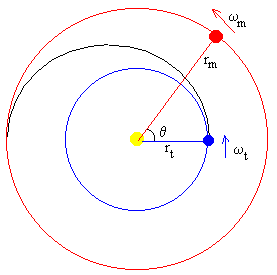

Grafica 2

Cuando tiene lugar el lanzamiento de la nave espacial en las proximidades de la Tierra. La nave espacial precisa de 258.9 días para moverse desde la posición inicial más cercana al Sol (perihelio) a su encuentro con Marte, en la posición más alejada del Sol (afelio). Durante este tiempo el desplazamiento angular de Marte es:

 $$ η_{marte} = ω_{marte} \times tiempo_{viaje} $$

 donde $$ ω_{marte} = rapidez_{angular de Marte} = \frac{v_m}{r_m} $$

 donde v_m = velocidad media orbital de marte y rm = distancia media de marte.

En el momento del lanzamiento, Marte debido a su menor velocidad angular, tiene que ir por delante de la Tierra a un ángulo $\theta$ que se muestra en la grafica 2 :

$$ \theta = 180° - \eta_{marte}$$

In [ ]:
w_marte = vel_marte / rM

eta_marte = w_marte * tiempo_ida * 24 *3600

## conversion a grados
eta_marte = eta_marte *180 / np.pi

theta_marte = 180 - eta_marte
theta_marte_original = theta_marte
print("El planeta Marte debe estar por delante de la Tierra durante el lanzamiento de la nave desde la Tierra", theta_marte, "grados")

El planeta Marte debe estar por delante de la Tierra durante el lanzamiento de la nave desde la Tierra 44.68770302355642 grados


Viaje de regreso:

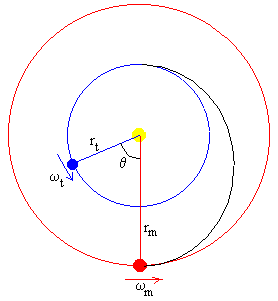

Grafica 3

La nave espacial empleará 258.9 días en regresar al a Tierra, durante este tiempo la Tierra se ha desplazado un ángulo:

 $$ η_{tierra} = ω_{tierra} \times tiempo_{viaje} $$

 donde $$ ω_{tierra} = rapidez_{angular de Tierra} = \frac{v_t}{r_t} $$

 donde v_t = velocidad media orbital de Tierra y rt = distancia media de Tierra.



La Tierra tiene que estar por detrás de Marte en el momento del lanzamiento de la nave espacial en las proximidades e  Marte ya que la Tierra se mueve mas rapido. Marte  tiene que ir por delante de la Tierra a un ángulo $\theta$ que se muestra en la grafica 3:

$$ \theta = \eta_{tierra} -180 $$

In [ ]:
w_tierra= vel_tierra / rT

eta_tierra = w_tierra * tiempo_ida * 24 *3600

## conversion a grados
eta_tierra = eta_tierra *180 / np.pi

theta_tierra = eta_tierra - 180
print("El planeta Tierra  debe estar por detras de Marte  durante el lanzamiento de la nave desde Marte", theta_tierra, "grados")

El planeta Tierra  debe estar por detras de Marte  durante el lanzamiento de la nave desde Marte 76.12981410544472 grados


##Duracion del viaje completo##

Como se observa en la grafica 2, en el instante de lanzamiento desde la Tierra t=0, el angulo de la Tierra es $\theta_T=0$ y el angulo de marte es $\theta_M = 44.7° = 0.78 rad$. La nave espacial viaja por 258.9 dias, entonces los angulos de los planetas en t=258.9 dias  son:

$$ \theta_{tierra}(t=258.9 dias) = \frac{v_{tierra}}{r_1} \times tiempo_{ida}$$

$$ \theta_{marte}(t=258.9 dias) = 0.78 rad + \frac{v_{marte}}{r_2} \times tiempo_{ida}$$





In [ ]:
theta_tierra = (vel_tierra / rT) * tiempo_ida * 24 *3600
print("El angulo de la Tierra en radianes  en un tiempo t=258.9 dias es ",theta_tierra)
print("El angulo de la Tierra en grados  en un tiempo t=258.9 dias es ",theta_tierra *180/np.pi)

El angulo de la Tierra en radianes  en un tiempo t=258.9 dias es  4.470308568661025
El angulo de la Tierra en grados  en un tiempo t=258.9 dias es  256.1298141054447


In [ ]:
theta_marte = (44.7*np.pi/180) + (vel_marte / rM) * tiempo_ida * 24 *3600
print("El angulo de Marte en radianes  en un tiempo t=258.9 dias es ",theta_marte)
print("El angulo de la Marte en grados  en un tiempo t=258.9 dias es ",theta_marte *180/np.pi)

El angulo de Marte en radianes  en un tiempo t=258.9 dias es  3.141807276316774
El angulo de la Marte en grados  en un tiempo t=258.9 dias es  180.01229697644357


Para iniciar el viaje de regreso tenemos que esperar un tiempo Δt hasta que la posición de Marte esté adelantado 76.1º=1.328 rad respecto de la Tierra. Es decir:  

$$\theta_T = ω_T × (tiempo_{ida} + Δt) $$

In [ ]:
w_marte = (vel_marte/rM) * 3600*24
w_tierra = (vel_tierra/rT) * 3600*24
print("la rapidez angular de marte y la tierra en rad/dia es ", w_marte,w_tierra)


la rapidez angular de marte y la tierra en rad/dia es  0.009120255058932904 0.017263539863235


así:
$$\theta_T = ω_T × (tiempo_{ida}) +  ω_T × Δt $$
$$\theta_T =  0.01726 × (258.9 dias) +  0.01726  × Δt $$
$$\theta_T =  4.47 +  0.01726  × Δt $$

por otro lado:
$$\theta_M = 0.780 + ω_M × (tiempo_{ida}) +  ω_M × Δt $$
$$\theta_M = 0.780 +  0.00912 ×(258.9 dias) +   0.00912 × Δt $$
$$\theta_M = 3.141168 +  0.00912× Δt $$

En el momento de iniciar el regreso se debe de cumplir que:
$$\theta_M - \theta_T = 1.328 - 2n\pi$$
 donde n es un número de vueltas completo, poniendo n=1 obtenemos el valor mínimo de Δt:

$$3.141168 +  0.00912× Δt - (4.47 +  0.01726  × Δt) = 1.328 - 2\pi $$

$$ 3.6264 + 0.00912× Δt -  0.01726  × Δt =0$$


$$0.00912× Δt -  0.01726  × Δt = -3.6264$$


$$ = Δt = \frac{-3.6264}{(0.00912-  0.01726)}$$

In [ ]:
delta_t = -3.626419341937315 / (0.009120255058932904 - 0.0172635398632356)
delta_t
print("El tiempo de estancia en Marte es de ,",delta_t , "dias")
tiempo_total = delta_t + 2*tiempo_ida
print("El tiempo total completo de viaje es  ,",tiempo_total, "dias")

El tiempo de estancia en Marte es de , 445.32635528370713 dias
El tiempo total completo de viaje es  , 963.2164987972214 dias


A este tiempo hay que sumar el correspondientes a las operaciones de despegue y al aterrizaje en la superficie de ambos planetas. Entonces un astronauta osado, que piensa viajar  hacia Marte y regresar a la Tierra  debe viajar minimo  963 dias o 2 años y medio.

###Uso de la esfera de influencia de un planeta para hallar velocidad de escape###

El radio de la esfera de influencia de un planeta es la distancia al planeta a la que podemos considerar despreciable la atracción del planeta en comparación con la fuerza que ejerce el Sol. Se calcula mediante la fórmula debida a Laplace:

$$ Re = d(\frac{M}{M_s})^ {2/5} $$

siendo d la distancia entre el Sol y el planeta considerado, M la masa del planeta, y Ms la masa del Sol.

Para la Tierra con:
La masa de la Tierra es M=5.98·10E24 kg, su radio RT=6.37·10E6 m, la distancia entre la Tierra y el Sol es d=1.496·10E11 m y la masa del Sol MS=1.98·10E30 kg.

In [ ]:
M=5.98E24
d=1.4910E11
MS = 1.98E30
radio_T = 6371E3
def influencia(d,M,MS):
  Re = d*((M/MS)**(2/5))
  return Re

Re_tierra= influencia(d,M,MS)
Re_tierraR = Re_tierra/radio_T
print("La esfera de influencia de la Tierra es de ",round(Re_tierraR,0), "radios terrestres" )

La esfera de influencia de la Tierra es de  145.0 radios terrestres


Para llevar la nave espacial desde la superficie de la Tierra al borde de su esfera de influencia es necesario proporcionarle una velocidad aproximadamente igual a la velocidad de escape $v_e$.

$$ 0.5mv_e^2 - \frac{GM_Tm}{R_T} = - \frac{GM_Tm}{R_e}$$

$$ 0.5v_e^2 - \frac{GM_T}{R_T} + \frac{GM_T}{R_e} = 0 $$

Se aplican metodos numericos para hallar las raices y entonces hallar la velocidad de escape $v_e$


In [ ]:
""" Se aplica metodo de newton -rahpson"""
f = lambda v: 0.5*(v**2) - (G*(M/radio_T)) + (G*(M/Re_tierra))

vel = np.linspace(0,20000,100)

y = f(vel)

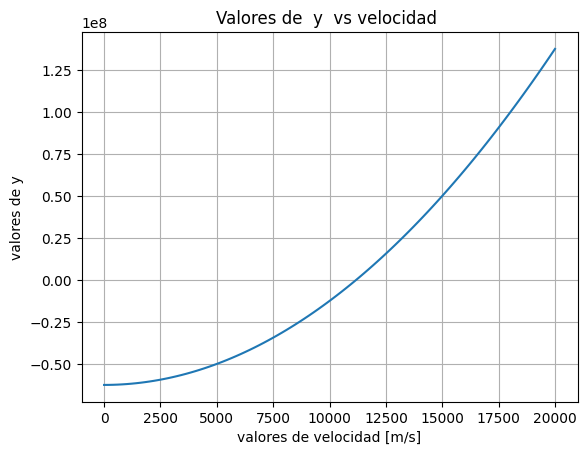

In [ ]:
plt.plot(vel,y)
plt.xlabel("valores de velocidad [m/s]")
plt.ylabel("valores de y")
plt.title("Valores de  y  vs velocidad ")
plt.grid()

In [ ]:
# metodo de newton
vel_escape_tierra = optimize.newton(f,12500)
print("La velocidad para lanzar la nave al borde de esfera de la Tierra  es ", vel_escape_tierra, "m/s")

La velocidad para lanzar la nave al borde de esfera de la Tierra  es  11151.201384018612 m/s


Para llevar la nave espacial de regreso ,  desde la superficie de Marte al borde de su esfera de influencia es necesario proporcionarle una velocidad aproximadamente igual a la velocidad de escape $v_e$.

$$ 0.5mv_e^2 - \frac{GM_Mm}{R_M} = - \frac{GM_Mm}{R_e}$$

$$ 0.5v_e^2 - \frac{GM_M}{R_M} + \frac{GM_M}{R_e} = 0 $$

Se aplican metodos numericos para hallar las raices y entonces hallar la velocidad de escape $v_e$

In [ ]:
Mm=6.578E23
radio_M = 3390E3
dm = 2.28E11

Re_marte= influencia(dm,Mm,MS)
Re_marteR = Re_marte/radio_M
print("La esfera de influencia de Marte es de ",round(Re_marteR,0), "radios marcianos" )


La esfera de influencia de Marte es de  172.0 radios marcianos


In [ ]:
""" Se aplica metodo de biseccion """
f2 = lambda v: 0.5*(v**2) - (G*(Mm/radio_M)) + (G*(Mm/Re_marte))

vel2 = np.linspace(0,6000,100)

y2 = f2(vel2)

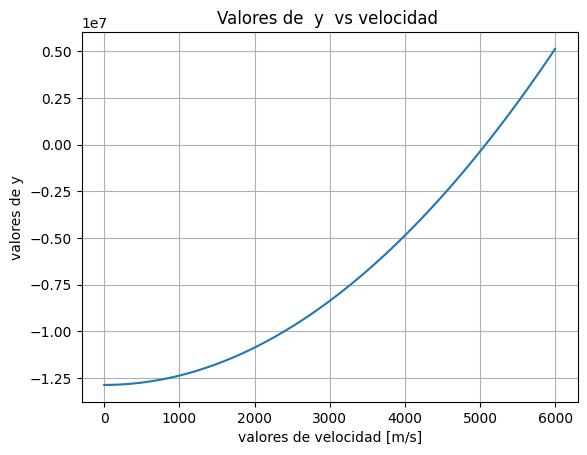

In [ ]:
plt.plot(vel2,y2)
plt.xlabel("valores de velocidad [m/s]")
plt.ylabel("valores de y")
plt.title("Valores de  y  vs velocidad ")
plt.grid()

In [ ]:
# metodo de biseccion
vel_escape_mars = optimize.bisect(f2,4500,5500)
print("La velocidad para lanzar la nave al borde de esfera de Marte  es ", vel_escape_mars, "m/s")

La velocidad para lanzar la nave al borde de esfera de Marte  es  5072.956114604334 m/s


La velocidad que tenemos que proporcionar a la nave espacial para que llegue al borde de la esfera de influencia de la Tierra desde su superficie es de 11151 m/s. Cuando llega al borde de la esfera de influencia a 145 radios terrestre   se debe proporcionar un cambio de velocidad de 2971.1 m/S para que describa una trayectoria de Hohmann, entonces en total el cambio de velocidad es Δv=11152.2+2971.1=14123.3 m/s

La velocidad que tenemos que proporcionar a la nave espacial para que llegue al borde de la esfera de influencia de  Marte desde su superficie es de 5073 m/s. Cuando llega al borde de la esfera de influencia a 172 radios marcianos se debe proporcionar un cambio de velocidad de -2669.7 m/s  para que describa una trayectoria de Hohmann de regreso a la Tierra, entonces en total el cambio de velocidad es Δv2=5069.9-2669.7=2400.2 m/s

###Ahora se verifican las fechas ideales  de lanzamiento hacia Marte y de amartizaje en los proximos dos años###

In [ ]:
# Defino el intervalo de fechas
start_date = "2024-06-01 00:00"
end_date = "2026-06-01 00:00"
time_interval_hours = 24  # Intervalo de tiempo en horas

# Convertir las fechas a objetos datetime
start_datetime = datetime.strptime(start_date, "%Y-%m-%d %H:%M")
end_datetime = datetime.strptime(end_date, "%Y-%m-%d %H:%M")

# Crear una lista de fechas en el intervalo
delta = timedelta(hours=time_interval_hours)
dates = []
while start_datetime <= end_datetime:
    dates.append(start_datetime.strftime("%Y-%m-%d %H:%M"))
    start_datetime += delta

# Crear listas para almacenar los resultados
mars_results = []
earth_results = []

# Iterar sobre las fechas y obtener las coordenadas eclípticas
for date in dates:
    t = Time(date)
    mars_barycentric = get_body_barycentric('mars', t)
    earth_barycentric = get_body_barycentric('earth', t)

    # Convertir la representación cartesiana a SkyCoord
    mars_coord = SkyCoord(mars_barycentric, frame='barycentrictrueecliptic')
    earth_coord = SkyCoord(earth_barycentric, frame='barycentrictrueecliptic')

    # Transformar a coordenadas eclípticas heliocéntricas
    mars_ecliptic = mars_coord.transform_to(HeliocentricEclipticIAU76)
    earth_ecliptic = earth_coord.transform_to(HeliocentricEclipticIAU76)

    # Almacenar los resultados en diccionarios  correspondientes
    mars_results.append({
        'Date': date,
        'Longitude': mars_ecliptic.lon.deg,
        'Latitude': mars_ecliptic.lat.deg,
        'Distance_AU': mars_ecliptic.distance.au,
    })

    earth_results.append({
        'Date': date,
        'Longitude': earth_ecliptic.lon.deg,
        'Latitude': earth_ecliptic.lat.deg,
        'Distance_AU': earth_ecliptic.distance.au,
    })

# Convertir los resultados en DataFrames de pandas
mars_df = pd.DataFrame(mars_results)
earth_df = pd.DataFrame(earth_results)


In [ ]:
# e crea un data frame con las coordenadas eclipticas de Marte y la Tierra, ademas sus diferencias
planetas = pd.DataFrame()
planetas["FECHA Y HORA"] = mars_df.Date
planetas["Lat ecliptica Marte [°]"] = mars_df.Latitude
planetas["Long_ecliptica_Marte_grados"] = mars_df.Longitude
planetas["Lat ecliptica Tierra [°]"] = earth_df.Latitude
planetas["Long_ecliptica_Tierra_grados"] = earth_df.Longitude
planetas["Diferenciaslong"] = (planetas["Long_ecliptica_Marte_grados"] - planetas["Long_ecliptica_Tierra_grados"])
planetas

,FECHA Y HORA,Lat ecliptica Marte [°],Long_ecliptica_Marte_grados,Lat ecliptica Tierra [°],Long_ecliptica_Tierra_grados,Diferenciaslong
0,2024-06-01 00:00,-5.038334,352.415719,-22.107732,249.095870,103.319849
1,2024-06-02 00:00,-4.779592,352.992892,-22.240500,250.119961,102.872931
2,2024-06-03 00:00,-4.520503,353.569342,-22.366832,251.145710,102.423632
3,2024-06-04 00:00,-4.261098,354.145081,-22.486680,252.173031,101.972050
4,2024-06-05 00:00,-4.001409,354.720123,-22.599993,253.201833,101.518290
...,...,...,...,...,...,...
726,2026-05-28 00:00,5.001273,14.448518,-21.485731,244.812403,-230.363884
727,2026-05-29 00:00,5.250376,15.005934,-21.644982,245.829236,-230.823302
728,2026-05-30 00:00,5.498691,15.563148,-21.797990,246.847807,-231.284659
729,2026-05-31 00:00,5.746194,16.120173,-21.944707,247.868070,-231.747896


In [ ]:
# se obtiene la fecha optima de lanzamiento cuando la diferencia entre los angulos es cercana a 44.6877 ° que se obtuvo anteriormente
P = pd.DataFrame()
P = planetas[abs(planetas["Diferenciaslong"]- theta_marte_original) < 0.5]
P

,FECHA Y HORA,Lat ecliptica Marte [°],Long_ecliptica_Marte_grados,Lat ecliptica Tierra [°],Long_ecliptica_Tierra_grados,Diferenciaslong
146,2024-10-25 00:00,23.432601,74.291255,11.964996,29.460771,44.830484
147,2024-10-26 00:00,23.501889,74.847228,12.308566,30.417928,44.429300


La fecha optima para el proximo lanzamiento  a Marte en los proximos dos años se encuentra entre el 25 y 26 de Octubre de 2024. Voy a determinar la hora exacta de lanzamiento

In [ ]:
# Defino el intervalo de fechas: un solo dia
start_date = "2024-10-25 00:00"
end_date = "2024-10-26 00:00"
time_interval_hours = 0.083  # Intervalo de tiempo en horas: cada 15 minutos

# Convertir las fechas a objetos datetime
start_datetime = datetime.strptime(start_date, "%Y-%m-%d %H:%M")
end_datetime = datetime.strptime(end_date, "%Y-%m-%d %H:%M")

# Crear una lista de fechas en el intervalo
delta = timedelta(hours=time_interval_hours)
dates = []
while start_datetime <= end_datetime:
    dates.append(start_datetime.strftime("%Y-%m-%d %H:%M"))
    start_datetime += delta

# Crear listas para almacenar los resultados
mars_results = []
earth_results = []

# Iterar sobre las fechas y obtener las coordenadas eclípticas
for date in dates:
    t = Time(date)
    mars_barycentric = get_body_barycentric('mars', t)
    earth_barycentric = get_body_barycentric('earth', t)

    # Convertir la representación cartesiana a SkyCoord
    mars_coord = SkyCoord(mars_barycentric, frame='barycentrictrueecliptic')
    earth_coord = SkyCoord(earth_barycentric, frame='barycentrictrueecliptic')

    # Transformar a coordenadas eclípticas heliocéntricas
    mars_ecliptic = mars_coord.transform_to(HeliocentricEclipticIAU76)
    earth_ecliptic = earth_coord.transform_to(HeliocentricEclipticIAU76)

    # Almacenar los resultados en las listas correspondientes
    mars_results.append({
        'Date': date,
        'Longitude': mars_ecliptic.lon.deg,
        'Latitude': mars_ecliptic.lat.deg,
        'Distance_AU': mars_ecliptic.distance.au,
    })

    earth_results.append({
        'Date': date,
        'Longitude': earth_ecliptic.lon.deg,
        'Latitude': earth_ecliptic.lat.deg,
        'Distance_AU': earth_ecliptic.distance.au,
    })

# Convertir los resultados en DataFrames de pandas
mars2_df = pd.DataFrame(mars_results)
earth2_df = pd.DataFrame(earth_results)



In [ ]:
# e crea un data frame con las coordenadas eclipticas de Marte y la Tierra, ademas sus diferencias
planetas2 = pd.DataFrame()
planetas2["FECHA Y HORA"] = mars2_df.Date
planetas2["Lat ecliptica Marte [°]"] = mars2_df.Latitude
planetas2["Long_ecliptica_Marte_grados"] = mars2_df.Longitude
planetas2["Lat ecliptica Tierra [°]"] = earth2_df.Latitude
planetas2["Long_ecliptica_Tierra_grados"] = earth2_df.Longitude
planetas2["Diferenciaslong"] = (planetas2["Long_ecliptica_Marte_grados"] - planetas2["Long_ecliptica_Tierra_grados"])
planetas2.head()

,FECHA Y HORA,Lat ecliptica Marte [°],Long_ecliptica_Marte_grados,Lat ecliptica Tierra [°],Long_ecliptica_Tierra_grados,Diferenciaslong
0,2024-10-25 00:00,23.432601,74.291255,11.964996,29.460771,44.830484
1,2024-10-25 00:04,23.432796,74.292799,11.965954,29.463425,44.829374
2,2024-10-25 00:09,23.433040,74.294730,11.967152,29.466743,44.827987
3,2024-10-25 00:14,23.433284,74.296661,11.968351,29.470061,44.826600
4,2024-10-25 00:19,23.433529,74.298593,11.969549,29.473380,44.825213


In [ ]:
# se obtiene la hora  optima de lanzamiento cuando la diferencia entre los angulos es cercana a 44.6877 ° que se obtuvo anteriormente
Q = pd.DataFrame()
Q = planetas2[abs(planetas2["Diferenciaslong"]- theta_marte_original) < 0.0008]
Q

,FECHA Y HORA,Lat ecliptica Marte [°],Long_ecliptica_Marte_grados,Lat ecliptica Tierra [°],Long_ecliptica_Tierra_grados,Diferenciaslong
103,2024-10-25 08:32,23.457476,74.488973,12.087506,29.800738,44.688235


La fecha optima para el proximo lanzamiento es el 25/10/2024 a las 08:32 UTC con un error de 0.0008° o 2.88 segundos de arco

### Cuando llega a Marte ? ###

La fecha juliana, día juliano o DJ (JD, por sus siglas en inglés) es el número de días y fracción transcurridos desde el mediodía del uno de enero del año 4713 a. C hasta una fecha determinada. Lo usare para determinar el numero de dias transcurridos hasta el dia del lanzamiento del 23/10/2024 , luego lo sumare con el tiempo de ida: 258.9 dias, se obtiene la fecha juliana para el amartizaje, luego se convierte esa fecha juliana a la fecha del calendario gregoriano que usamos normalmente

In [ ]:
""" Se requiere del año, mes y dia del calendario gregoriano(el normal) para hallar los dias julianos"""
def fecha_juliana(Y,M,D):
  A = Y / 100
  B = 2 - A + (A/4)
  JD = math.floor(365.25 * (Y + 4716)) + math.floor(30.6001* (M+1)) + D +B - 1524.5

  return JD

#dias julianos para el dia de lanzamiento
numero_dias_lanzamiento = fecha_juliana(2024,10,25)

# dias julianos para el dia del amartizaje, se suma lo anterior con el tiempo de ida
amartizaje = numero_dias_lanzamiento + tiempo_ida

print("dias julianos para la fecha del lanzamiento",numero_dias_lanzamiento)
print("dias julianos para la fecha de amartizaje",amartizaje)

dias julianos para la fecha del lanzamiento 2460608.32
dias julianos para la fecha de amartizaje 2460867.2650717567


In [ ]:
""" ahora se determina la fecha en el calendario gregoriano del amartizaje """
a = amartizaje + 32044
b = (4 * a + 3) // 146097
c = a - (146097 * b) // 4
d = (4 * c + 3) // 1461
e = c - (1461 * d) // 4
m = (5 * e + 2) // 153


In [ ]:
day = e - (153 * m + 2) // 5 + 1
month = m + 3 - 12 * (m // 10)
year = 100 * b + d - 4800 + (m // 10)

print("La fecha de amartizaje es:  ", round(day,0), "del mes ", month, "y del año",year)


La fecha de amartizaje es:   10.0 del mes  7.0 y del año 2025.0


ANIMACION DE LA ORBITA QUE DESCRIBE LA NAVE EN EL VIAJE DE IDA

In [ ]:

# Constantes y parámetros
au = 1.496e11  # Unidad astronómica en metros
mu_sun = 1.327e20  # Constante gravitacional estándar para el Sol en m^3/s^2

# Diferencia de ángulo entre Tierra y Marte (en grados)
angle_diff_deg = 44.67
angle_diff_rad = np.radians(angle_diff_deg)

# Distancias medias Tierra-Sol y Marte-Sol en unidades astronómicas
r_earth = 1.0
r_mars = 1.52

# Semiejes mayores de las órbitas de la Tierra y de Marte
a_earth = r_earth * au
a_mars = r_mars * au

e = (a_mars - a_earth) / (a_mars + a_earth)

# Velocidades orbitales iniciales de la Tierra y de Marte
v_earth = np.sqrt(mu_sun / a_earth)
v_mars = np.sqrt(mu_sun / a_mars)

# Posición inicial de la Tierra en la órbita (en x = a_earth, y = 0)
x_earth_init = a_earth
y_earth_init = 0

# Posición inicial de Marte, ajustando por la diferencia angular
x_mars_init = a_mars * np.cos(angle_diff_rad)
y_mars_init = a_mars * np.sin(angle_diff_rad)

# Coordenadas de la órbita de la Tierra
theta_earth = np.linspace(0, 2*np.pi, 1000)
x_earth = a_earth * np.cos(theta_earth)
y_earth = a_earth * np.sin(theta_earth)

# Coordenadas de la órbita de Marte
theta_mars = np.linspace(0, 2*np.pi, 1000)
x_mars = a_mars * np.cos(theta_mars)
y_mars = a_mars * np.sin(theta_mars)

# Definir puntos de la transferencia de Hohmann
r_transfer_inner = a_earth
r_transfer_outer = a_mars

# Semieje mayor de la órbita de transferencia de Hohmann (suma de semiejes de las órbitas)
a_transfer = (r_transfer_inner + r_transfer_outer) / 2

c_transfer = e*a_transfer

# Coordenadas de la órbita de transferencia de Hohmann
theta_transfer = np.linspace(0, np.pi, 20)
x_transfer = a_transfer * np.cos(theta_transfer)
y_transfer = a_transfer * np.sin(theta_transfer)

# Graficar las órbitas y la transferencia de Hohmann
fig = plt.figure(figsize=(6,6))
camara = Camera(fig) # creo el objeto camara con fig

# Órbitas de la Tierra y de Marte
plt.plot(x_earth, y_earth, label='Órbita de la Tierra', color='blue')
plt.plot(x_mars, y_mars, label='Órbita de Marte', color='red')
plt.scatter(x_mars_init, y_mars_init, color='red')
plt.scatter(x_earth_init, y_earth_init, color='blue')

# angulos barridos por la Tierra y marte
th_m = ((2*np.pi) /686.97) * 258.9
th_T = ((2*np.pi) /365.25) * 258.9
th_m_inicial = 44.67*np.pi/180

theta_marte_final  =(th_m_inicial ) + th_m
theta_tierra_final =  th_T

angulos_grafica_m = np.linspace(th_m_inicial,theta_marte_final,20)
angulos_grafica_t = np.linspace(0,theta_tierra_final,20)


x_2_m = a_mars * np.cos(angulos_grafica_m)
y_2_m = a_mars * np.sin(angulos_grafica_m)



x_2_t = a_earth * np.cos(angulos_grafica_t)
y_2_t = a_earth* np.sin(angulos_grafica_t)




# Puntos de inicio y fin de la transferencia de Hohmann
plt.scatter(x_earth_init, y_earth_init, color='blue', label='Inicio de Hohmann (Tierra)')
plt.scatter(-a_mars, 0, color='purple', label='Fin de Hohmann (Marte)')
plt.scatter(0, 0, color='orange', label='Sol')
# Transferencia de Hohmann
plt.plot(x_transfer-c_transfer, y_transfer, linestyle='--', color='black', label='Transferencia de Hohmann')


for i in range(len(theta_transfer)):
  plt.plot(x_earth, y_earth, color='blue')
  plt.plot(x_mars, y_mars, color='red')
  plt.scatter(x_earth_init, y_earth_init, color='green')
  plt.scatter(-a_mars, 0, color='purple')
  plt.scatter(0, 0, color='orange',s=500)
  plt.plot(x_transfer-c_transfer, y_transfer, linestyle='--', color='black')
  plt.scatter((x_transfer-c_transfer)[i], y_transfer[i], linestyle='--', color='black')
  plt.scatter(x_2_m[i], y_2_m[i], color='red')
  plt.scatter(x_2_t[i], y_2_t[i], color='blue')


  camara.snap()



plt.title(f'Transferencia de Hohmann Tierra-Marte (Diferencia Angular: {angle_diff_deg}°)')
plt.xlabel('Distancia (m)')
plt.ylabel('Distancia (m)')
plt.legend(loc='lower right')
plt.grid(True)
plt.axis('equal')
plt.close()



In [ ]:
animacion=camara.animate() # hace la animacion
HTML(animacion.to_jshtml())

###APLICACION DE INTERPOLACION PARA RESOLVER UN PROBLEMA DE LA TRAYECTORIA ORBITAL DE LA NAVE###

Se tiene una grafica de un conjunto de puntos que representan la coordenada en el eje y de la nave  medida en unidades astronomicas vs el tiempo de vuelo en dias. A partir de esto, refutar o demostrar la siguiente afirmacion:  el tiempo
minimo  para alcanzar el semieje menor de la trayectoria de Hohmann sería aproximadamente 129.45 dias, que corresponden a la mitad del tiempo de ida hacia Marte.

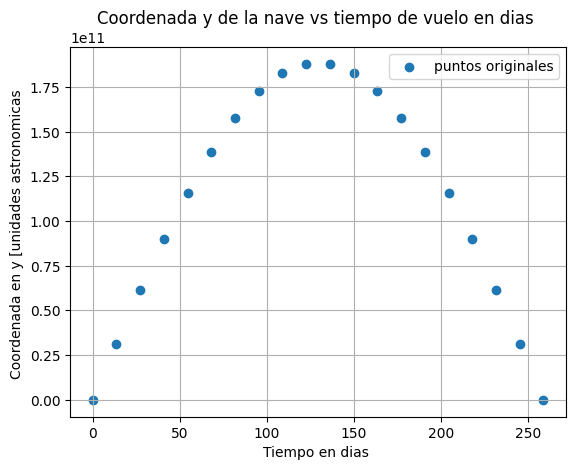

In [ ]:
t_x = np.linspace(0,258.9,20)
plt.scatter(t_x,y_transfer,label="puntos originales")
plt.xlabel("Tiempo en dias ")
plt.ylabel("Coordenada en y [unidades astronomicas ")
plt.grid()
plt.title("Coordenada y de la nave vs tiempo de vuelo en dias ")
plt.legend()

Solucion

Uso Cubicspline para interpolar y grafico con los puntos originales

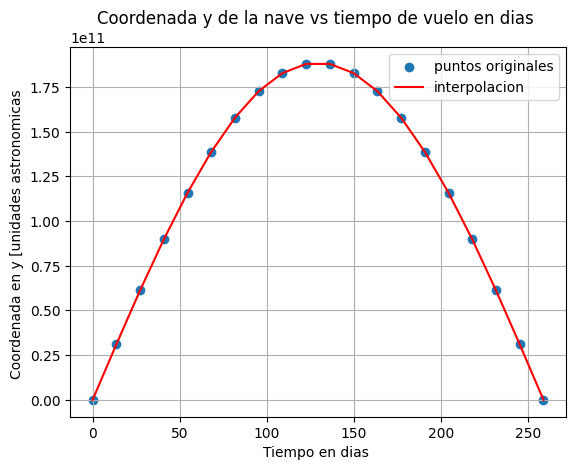

In [ ]:
csy = CubicSpline(t_x,y_transfer)
plt.scatter(t_x,y_transfer,label="puntos originales")
plt.plot(t_x,csy(t_x), color="red", label="interpolacion")
plt.xlabel("Tiempo en dias ")
plt.ylabel("Coordenada en y [unidades astronomicas ")
plt.title("Coordenada y de la nave vs tiempo de vuelo en dias ")
plt.grid()
plt.legend()

In [ ]:
""" para  t=129.45  dias, la coordenada en y de la nave espacial  en unidades astronomicas  es """
y_100 = float(csy(129.45))
y_100 = y_100/ rT
y_100

1.2650713461082521

El anterior valor es el b calculado con la grafica , ahora se compara con el b obtenido por la formula en una elipse:

$$a^2 -c^2 = b^2$$

In [ ]:
b = np.sqrt(a_transfer**2 - c_transfer**2)
b = b/ rT
b

1.2378474293210187

In [ ]:
error = ((y_100-b)/b)*100
print("el error relativo entre los semiejes menores es del  ",round(error,1), "%")
print("el error es bajo, entonces se verifica la hipotesis propuesta")

el error relativo entre los semiejes menores es del   2.2 %
el error es bajo, entonces se verifica la hipotesis propuesta


##ANALISIS DE RESULTADOS: ##

Viaje Tierra Marte:
-La nave debe despegar  desde la superficie  terrestre el día  25/10/2024 a las 8:32 UTC, a una velocidad de 11150 m/s para que alcance en el espacio el radio de influencia de la Tierra a 145.5 Radios Terrestres.
-Cuando alcanza dicha distancia se debe proporcionar un aumento de velocidad (un delta) de +2971 m/s para que llegue a Marte. Le toma en total 258.9 días viajar desde nuestro planeta hasta allá.
-Cuando llega al radio de influencia de Marte(172 Radios marcianos) debe frenar con un delta de -2669 m/s para que alcance la superficie. La nave amartiza el día 10 de julio de 2025.


Marte-Tierra: -Cuando la nave llega a Marte debe esperar a que este planeta este adelantado 76° con respecto a la Tierra para volver, esto representa una espera mínima de 445 días.
Cuando hayan pasado   estos días, se puede lanzar la nave desde Marte con velocidad de 5072 m/s para que llegue a su radio de influencia y debe darse un impulso de 2669 m/s para que llegue a la Tierra. El viaje de regreso se demora 258.9 días
El viaje total más corto posible a Marte de ida a vuelta es de 963.21 días.


QUE IMPLICAN LOS RESULTADOS:
Las naves dirigidas a Marte solo se pueden lanzar  en determinadas épocas llamadas ventanas cuando el ángulo de diferencia es de 44.68°.

-La velocidad de escape y los deltas: implican  gasto de combustible y eficiencia.  Se debe buscar un combustible que garantice las velocidades de escape y deltas obtenidos con el menor peso posible. O buscar trayectorias alternas que impliquen mayor eficiencia.

-Tiempo de viaje: implica gasto de provisiones, consumo de aire y electricidad, exposición prolongada a a radiación cósmica, estrés de tripulación. Tambien  se plantea una colonia permanente que no regrese a la Tierra.


-Una nave en orbita de Hohmann también cumple las leyes de Kepler.Su velocidad no es la misma en diferentes puntos de la orbita. Hay que hacer calculos muy exactos para la comunicación con  la tripulación ya que las ondas de radio  se demoran algunos minutos en llegar.


**CONCLUSIONES:**
-En la modelación de un viaje a Marte se debe tener en cuenta principios muy importantes de la naturaleza como las leyes de Kepler, ley de conservacion del momento angular, conservacion de la energia, esfera de influencia de un planeta y ley de gravitacion universal.

-Los métodos computacionales son útiles para determinar los parámetros orbitales de una nave espacial que a su vez sirven para hacer una simulación.

-La simulación efectuada en este trabajo muestra que los parámetros obtenidos son adecuados, ya que la nave describe una órbita semielíptica y llega sin problemas al planeta Marte.

--La interpolación es una  herramienta útil para determinar la posición de la nave en un tiempo determinado.

-Sería interesante comparar el tiempo de viaje, velocidad de escape y deltas de velocidad obtenidas con  la órbita  de Hohmann  con valores de otras maniobras como la transferencia bielíptica.

-Sería interesante complicar más el problema: excentricidades de Tierra y Marte, influencia de otros planetas, etc.



**BIBLIOGRAFIA**:
-Colaboradores de Wikipedia. (2024f, agosto 7). Fecha juliana. Wikipedia, la Enciclopedia Libre. https://es.wikipedia.org/wiki/Fecha_juliana

-Viaje de la Tierra a Marte. (s. f.-c). http://www.sc.ehu.es/sbweb/fisica3/celeste/marte/marte.htm

- Órbita de transferencia de Hohmann. (s. f.). http://www.sc.ehu.es/sbweb/fisica3/celeste/transferencia/transferencia.html
l
